## SOM

In [146]:
import numpy as np
import matplotlib.pyplot as plt

In [147]:
def HSV2RGB(h,s,v):
    i = np.floor(h*6)
    f = h * 6.0 - i
    p = v * (1.0 - s)
    q = v * (1.0 - f * s)
    t = v * (1.0 - (1.0 - f) * s)

    imod = i%6
    if(imod==0): return p,q,v
    elif(imod==1): return t,p,v
    elif(imod==2): return v,p,q
    elif(imod==3): return v,t,p
    elif(imod==4): return q,v,p
    elif(imod==5): return p,v,t

In [148]:
n = 16 # No. of elements
kc = 100.0

L = (np.random.rand(n) < 0.5) * 2.0 - 1 # Binary array length
phi = np.random.rand(n) * 2 * np.pi # Random angle

In [149]:
ext = 50.0
Nhalf = 100
N = Nhalf * 2 + 1

x, y = np.meshgrid(np.linspace(-ext*0.5, ext*0.5, N), np.linspace(-ext*0.5, ext*0.5, N))

Z = np.zeros([N,N]) # Orientation
S = np.zeros([N,N]) # Selectivity ??

Zx = np.zeros([N,N])
Zy = np.zeros([N,N])

In [150]:
for a in range(N):
    for b in range(N):
        zx = 0.0
        zy = 0.0

        for j in range(n):
            theta = (j+1) * np.pi / n
            XKplusPhi = x[a,b] * np.cos(theta) + y[a,b] * np.sin(theta) #+ phi[j]
            zx += L[j] * np.cos(XKplusPhi)
            zy += L[j] * np.sin(XKplusPhi)

        Zx[a][b] = zx
        Zy[a][b] = zy
        Z[a][b] = (np.arctan2(zy,zx) + np.pi)
        S[a][b] = np.sqrt(zx**2 + zy**2)

In [151]:
# Generate map image
Smax = np.max(S)
map = np.zeros([N,N,3])
mapsel = np.zeros([N,N,3])

for a in range(N):
    for b in range(N):
        map[a,b,:] = HSV2RGB(Z[a,b]/(2*np.pi), 1.0, 1.0)
        mapsel[a,b,:] = HSV2RGB(Z[a,b]/(2*np.pi), 1.0, S[a,b]/Smax)

Text(0.5, 1.0, 'Orientation map')

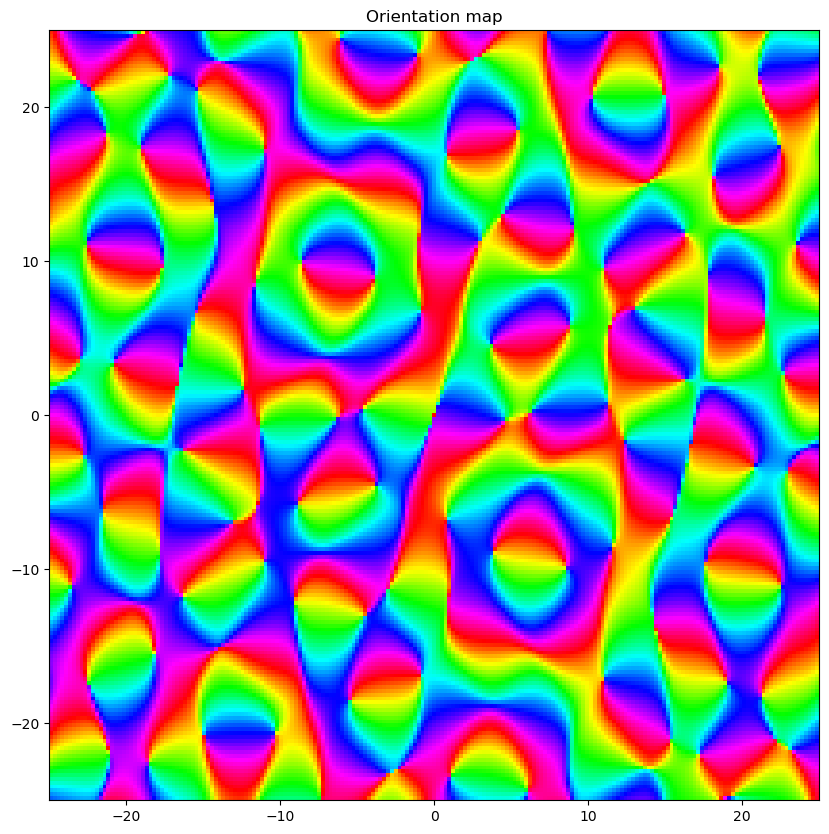

In [152]:
plt.figure(figsize=(10,10))
plt.imshow(map, extent=[-ext*0.5, ext*0.5, -ext*0.5, ext*0.5])
plt.title('Orientation map')

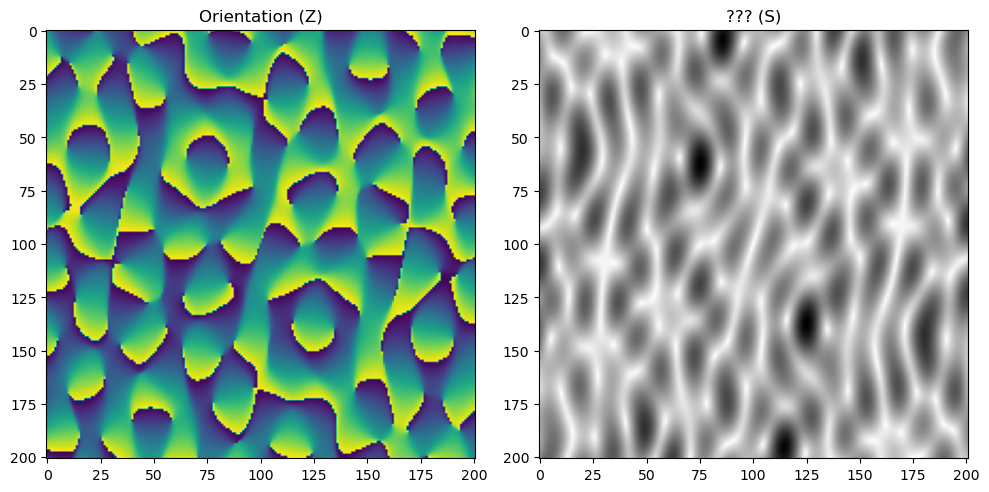

In [153]:
plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.imshow(Z)
plt.title('Orientation (Z)')
plt.subplot(1,2,2)
plt.imshow(S, 'binary')
plt.title('??? (S)')
plt.tight_layout()

In [154]:
# np.save('../data/mat/SOM_orient_v2.npy', Z)